In [192]:
!pip3 install ColabTurtlePlus

In [1]:
from numpy.random import choice
import numpy as np
import matplotlib.pyplot as plt

import re
from ColabTurtlePlus import Turtle as t

# Formal semantics

In [3]:
def normalize(arr):
    return arr / np.sum(arr)


def apply_rule(match, grammar):
    probs, subs = zip(*grammar[match.group(0)])
    sub = choice(subs, p=normalize(probs))
    return sub

## Basic arithmetic as a CFG

We will use $\lambda$ expressions to encode the meaning of our operators. Thankfully this is made quite easy by Python's lambda syntax, which we have seen a couple of weeks ago.

In [30]:
# Let's define some meanings!
plusOne = lambda x: x+1
one = 1

In [31]:
plusOne(plusOne(one))

3

Python's `eval` function plays the role of the interpretation function which we discussed in class. 

In [32]:
eval('plusOne(plusOne(one))')

3

In [310]:
CFG_arithmetic = {
    '<S>': ['plusOne(<S>)', 'one']
}

In [ ]:
tuple

In [309]:
def complete(sentence, grammar):
    
    while '<' in sentence:
        sentence = re.sub(
            '<(.*?)>', 
            lambda match: apply_rule(match, grammar), 
            sentence
        )
    
    return sentence

In [62]:
generate_random_sentences(CFG_arithmetic, 1)

['plusOne(plusOne(plusOne(plusOne(plusOne(plusOne(one))))))']

In [63]:
# plot distribution of numbers obtained with this grammar
numbers = [eval(i) for i in generate_random_sentences(CFG_arithmetic, 10000)]

Note that the frequency of $n$ is $2^{-n}$. Can you tell why?

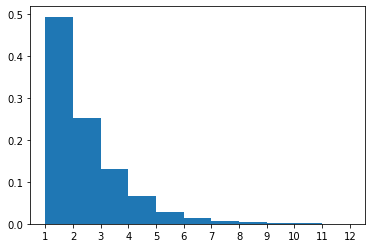

In [64]:
plt.hist(numbers, density=True, bins=np.arange(1,13))
plt.xticks(np.arange(1, 13))
plt.show()

## A grammar for shapes

Instead of defining meanings ourselves, we can rely on already existing libraries, even if they were not meant to be used with a CFG. For instance, consider Python's 'turtle' library.

In [266]:
grammar = {
    '<drawing>': [
        (8, '<movement><drawing>'),
        (1, '\tpass'),
        # (1, '\tt.home()')
    ],
    '<movement>': [
        (1, '\tt.forward(<distance>) \n'),
        (1, '\tt.backward(<distance>) \n'),
        (1, '\tt.right(<angle>) \n'),
        (1, '\tt.left(<angle>) \n'),
        # (0.5, '\tt.face(<angle>) \n'),
        (1, '\tt.circle(<distance>,<angle>) \n')
    ],
    '<distance>': [
        (1, '10'),
        (1, '20'),
        (1, '30'),
    ],
    '<angle>': [
        (1, '30'),
        (1, '60'),
        (1, '90'),
        (1, '170')
    ]
}

In [307]:
instructions = complete('<drawing>', grammar)

program = f"""
t.clearscreen()
t.initializeTurtle()
t.hideturtle()
t.color('black')
t.speed(13)
for i in range(20):
{instructions}
if -10 > t.getx() > 10:
    t.home()
"""

exec(program)